# Main figures

This notebook plots the constraints in the HNL parameter space.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy import interpolate

from hnl_apps import *
from hnl_apps.plot_tools import *
from hnl_apps.const import *
from hnl_apps.exp import *

from Nlimits import *

from Nlimits.constraint_dict import *
from Nlimits.plotter import *

# Minimal model -- mixing with muon

In [3]:
table = np.load("limits_computed/T2K_minimal_Umu4.npy", allow_pickle=True)
m4_grid, usqr_grid, lifetime_weak, event_rate_weak = table

table_ps191 = np.load("limits_computed/PS191_minimal_Umu4.npy", allow_pickle=True)
m4_grid_ps191, usqr_grid_ps191, lifetime_weak_ps191, event_rate_weak_ps191 = table_ps191

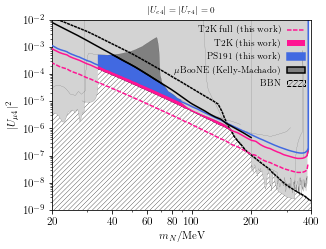

In [6]:
######
fig, ax = std_fig(ax_form= [0.15,0.14,0.82,0.80])

# HNL mass span
x = np.logspace(np.log10(20),np.log10((m_neutral_kaon - m_mu)*1e3), 1000, endpoint=True)

###################################
# plot all existing constraints

list_of_bounds=umu4.get_individual_bounds(muon_bounds, m4min=0.01, m4max=0.2)
LW = 0.1
# _ = plot_bound(ax, list_of_bounds['SIN_87'], units=1e3)
_ = plot_bound(ax, list_of_bounds['PSI_87'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PS191'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['KEK'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['NA62_21'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_lowT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_highT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['deGouvea_lowmass'], units=1e3, lw=LW)

############################################
# PS191 rescaled
# N_observed = 30 # before handscan
# no_bkg, all_bkg = get_PS191_limit(x*1e-3, nevent_for_new_limit = np.sqrt(N_observed))
# _, all_sig = get_PS191_limit(x*1e-3, nevent_for_new_limit = N_observed+np.sqrt(N_observed))
# ax.fill_between(x, np.ones(len(no_bkg)), no_bkg, facecolor='lightblue', lw=0.0,zorder=0)
# # ax.fill_between(x, no_bkg, all_bkg, facecolor='lightblue', lw=0.0, label=r'PS191')
# # ax.fill_between(x, all_bkg, all_sig, facecolor='lightblue', lw=0.0)
# ax.plot(x, no_bkg, color='dodgerblue', ls='-', zorder=10, label=r'PS191',lw=2)
# # ax.plot(x, all_bkg, color='dodgerblue', ls='--', zorder=10)
# # ax.plot(x, all_sig, color='dodgerblue', dashes=(2,1), zorder=10)

############################################
# our T2K bound -- Weak Interaction only
Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=event_rate_weak, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['None'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], fc='None',lw=1.5, zorder=0)
ax.plot(bound[:,0],bound[:,1], c='deeppink', lw=1.5, zorder=10)
ax.fill_between(bound[:,0],bound[:,1],np.ones(len(bound[:,1])), fc='deeppink', label=r'T2K (this work)', lw=1.5, zorder=0)
# future ND280 -- 2e22 POT equivalent
ax.plot(bound[:,0],bound[:,1]/np.sqrt(POT_RATIO_FULL_T2K), c='deeppink', dashes=(3,1), label=r'T2K full (this work)', lw=1.5, zorder=10)

############################################
# our PS191 bound (our own calculation)
Xi,Yi,Zi=interp_grid(x=m4_grid_ps191*1e3, y=usqr_grid_ps191 , z=event_rate_weak_ps191, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['royalblue'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], label=r'PS191 (this work)', ec='royalblue', fc='royalblue',lw=1.5, zorder=0)
ax.plot(bound[:,0],bound[:,1], c='royalblue',  lw=1.5, zorder=10)






#########################
# MuBooNE
this_file = 'digitized/muboone_kelly_machado/PS_eff_avg.dat'
# this_file = 'digitized/muboone_kelly_machado/PS_eff_scalar.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
Umu4sq *= np.sqrt(2) # from Majorana --> Dirac (only approximate -- neglects effect on efficiencies)
f = interpolate.interp1d(np.log10(m4), np.log10(Umu4sq), kind='linear', bounds_error=False, fill_value=np.nan, assume_sorted=False)    

ax.fill_between(x, 10**f(np.log10(x))*np.sqrt(2), np.ones(len(f(x))), fc='grey', ec='black', lw=1.5, label=r'$\mu$BooNE (Kelly-Machado)', alpha=1, zorder=0)
ax.plot(x, 10**f(np.log10(x))*np.sqrt(2), c='black', lw=1.5, zorder=10)

############################################
# Boyarki's BBN
# mbound,ubound = np.genfromtxt('digitized/Boyarsky_et_al/BBN_Umu4_lower_bound.dat',unpack=True)
# ax.plot(mbound*1e3,ubound, c='green',lw=1)

############################################
# SABTI BBN
BBNCOLOR='black'
matplotlib.rcParams['hatch.color'] = BBNCOLOR  # previous pdf hatch linewidth
matplotlib.rcParams['hatch.linewidth'] = 0.3  # previous pdf hatch linewidth

e_BBN,u_BBN = np.genfromtxt("digitized/Sabti_et_al/mixing_mN_muon.dat", unpack=True)
ax.fill_between(e_BBN*1e3, u_BBN, u_BBN*0, fc='None', linestyle='--', ec=BBNCOLOR,  hatch='/////', zorder=-100, label=r'BBN')
ax.plot(e_BBN*1e3, u_BBN, c=BBNCOLOR, dashes=(2,0.5), lw=1.5, zorder=1)




####
# labels
ax.set_title(r"$|U_{e4}| = |U_{\tau 4}| = 0$",fontsize=9)
ax.legend(loc='upper right', markerfirst=False, frameon=False, 
          framealpha=1, borderpad=0.2, edgecolor='None', facecolor='white', ncol=1, fontsize=9)


ax.set_xlim(np.min(x),np.max(x))
ax.set_ylim(1e-9,1e-2)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$|U_{\mu 4}|^2$")
ax.set_xlabel(r"$m_{N}$/MeV")

# ax.set_yticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2])
ax.set_xticks(np.array([20, 40, 60, 80, 100, 200, 400]))
ax.set_xticklabels(np.array([20,40,60,80,100,200,400]))
# ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.5,c='black',lw=0.1)
# ax.grid(axis='x', which='major',dashes=(6,1),alpha=0.5,c='black',lw=0.1)
fig.savefig('plots/weak_decays.pdf')
fig.savefig('plots/weak_decays.png', dpi=400)

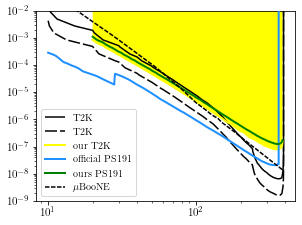

In [7]:
fig,ax=std_fig()
x = np.logspace(np.log10(10),np.log10((m_neutral_kaon - m_mu)*1e3), 10000, endpoint=True)

e_t2k,u_t2k=np.genfromtxt("limits_computed/currentT2K.csv", unpack=True, delimiter=",")
ax.plot(e_t2k, u_t2k, c='black', dashes=(8,0), lw=1.5, label=r'T2K')
e_t2k,u_t2k=np.genfromtxt("limits_computed/finalT2K.csv", unpack=True, delimiter=",")
ax.plot(e_t2k, u_t2k, c='black', dashes=(8,2), lw=1.5, label=r'T2K')
############################################
# our T2K bound -- Weak Interaction only
Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=event_rate_weak, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['royalblue'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], fc='yellow',lw=0, zorder=0)
ax.plot(bound[:,0],bound[:,1], c='yellow', label=r'our T2K', lw=2, zorder=10)

############################################
# PS191 rescaled
N_observed = 30 # before handscan
no_bkg, all_bkg = get_PS191_limit(x*1e-3, nevent_for_new_limit = np.sqrt(N_observed))
_, all_sig = get_PS191_limit(x*1e-3, nevent_for_new_limit = N_observed+np.sqrt(N_observed))
ax.plot(x, no_bkg, color='dodgerblue', ls='-', zorder=10, label=r'official PS191',lw=2)

Xi,Yi,Zi=interp_grid(x=m4_grid_ps191*1e3, y=usqr_grid_ps191 , z=event_rate_weak_ps191, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['royalblue'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.plot(bound[:,0],bound[:,1], c='green', label=r'ours PS191', lw=2, zorder=10)

# this_file = 'Nlimits/digitized/PS-191/UeUmu_K.dat'
# m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
# plt.plot(m4, Umu4sq)

this_file = 'digitized/muboone_kelly_machado/PS_eff_avg.dat'

m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
f = interpolate.interp1d(np.log10(m4), np.log10(Umu4sq), kind='linear', bounds_error=False, fill_value='extrapolate', assume_sorted=False)    

ax.plot(x, 10**f(np.log10(x)), c='black', dashes=(3,1), lw=1.5, label=r'$\mu$BooNE', zorder=10)

ax.legend(loc='lower left')
ax.set_ylim(1e-9,1e-2)
ax.set_yscale("log")
ax.set_xscale("log")

# Magnetic moment transition

In [8]:
table = np.load("limits_computed/T2K_mag_mom_Umu4.npy", allow_pickle=True)
m4_grid, usqr_grid, lifetime_mag_mom, event_rate_mag_mom = table

table_ps191 = np.load("limits_computed/PS191_mag_mom_Umu4.npy", allow_pickle=True)
m4_grid_PS191, usqr_grid_PS191, lifetime_mag_mom_PS191, event_rate_mag_mom_PS191 = table_ps191

In [13]:
hnl_tools.get_event_rate((0.200,1e-6), flavor_struct=[0.0,1.0,0.0], dipoles=[0,0,0], GX=0, detector = exp.nd280)

16.854612423210575

/Users/matheushostert/Repos/stdHNL/hnl_apps/plot_tools.py:217: RuntimeWarning: overflow encountered in double_scalars
  ratio_old_new = prob_old/prob_new.filled()/ratio_of_areas


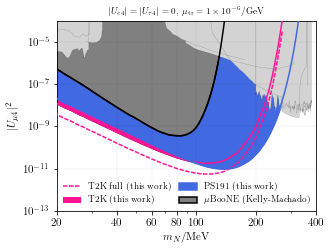

In [19]:
######
fig, ax = std_fig()

# HNL mass span
x = np.logspace(np.log10(20),np.log10((m_neutral_kaon - m_mu)*1e3), 1000, endpoint=True)


###################################
# plot all existing constraints

list_of_bounds=umu4.get_individual_bounds(muon_bounds, m4min=0.01, m4max=0.2)
LW = 0.1
# _ = plot_bound(ax, list_of_bounds['SIN_87'], units=1e3)
_ = plot_bound(ax, list_of_bounds['PSI_87'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PS191'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['KEK'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['NA62_21'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_lowT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_highT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['deGouvea_lowmass'], units=1e3, lw=LW)

############################################
# our T2K bound -- magnetic moment
Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=event_rate_mag_mom, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['None'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], fc='None',lw=1.5, zorder=0)
ax.plot(bound[:,0],bound[:,1], c='deeppink', lw=1.5, zorder=10)
ax.fill_between(bound[:,0],bound[:,1],np.ones(len(bound[:,1])), fc='deeppink', label=r'T2K (this work)', lw=1.5, zorder=0)
# future ND280 -- 2e22 POT equivalent
ax.plot(bound[:,0],bound[:,1]/np.sqrt(POT_RATIO_FULL_T2K), c='deeppink', dashes=(3,1), label=r'T2K full (this work)', lw=1.5, zorder=10)


############################################
# our PS191 bound (our own calculation)
Xi,Yi,Zi=interp_grid(x=m4_grid_PS191*1e3, y=usqr_grid_PS191 , z=event_rate_mag_mom_PS191, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['royalblue'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], label=r'PS191 (this work)', ec='royalblue', fc='royalblue',lw=1.5, zorder=0)
ax.plot(bound[:,0],bound[:,1], c='royalblue',  lw=1.5, zorder=10)

#########################
# MuBooNE
dip = 5e-7
new_muboone_bound = rescale_muboone_to_SBN(x*1e-3, dipoles=[0,dip,0], detector=exp.muboone_numi_absorber)
ax.fill_between(x, new_muboone_bound, np.ones(len(new_muboone_bound)), fc='grey', ec='black', lw=1.5, label=r'$\mu$BooNE (Kelly-Machado)', alpha=1, zorder=0)
ax.plot(x, new_muboone_bound, c='black', lw=1.5, zorder=10)

############################################
# BBN -- tau = 0.023 s
BBNCOLOR='orchid'
matplotlib.rcParams['hatch.color'] = BBNCOLOR  # previous pdf hatch linewidth
matplotlib.rcParams['hatch.linewidth'] = 0.2  # previous pdf hatch linewidth

Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=c_LIGHT*lifetime_mag_mom, logx=False, logy=True)
level_1 = contour(Xi, Yi, Zi, levels = [100], colors=['None'], linestyles=['-']) #NEW CONSTRAINT
# _ = contourf(Xi, Yi, Zi, levels = [100,np.inf], colors=['None'], alpha=0, hatches=['/////////////'], linestyles=['-'], zorder=1) #NEW CONSTRAINT
bound = level_1.collections[0].get_paths()[0].vertices  #grab the coords of the bound
# ax.vlines(bound[0,0],0,1, colors=BBNCOLOR,  lw=1.5)

####
# labels
ax.set_title(r"$|U_{e4}| = |U_{\tau 4}| = 0$,  $\mu_{\rm tr} = 1\times 10^{-6}/$GeV",fontsize=9)
ax.legend(loc='lower left', frameon=False, ncol=2, fontsize=9, columnspacing=1., borderaxespad=0.25)
# ax.annotate(r"$c\tau^0_N = \left(\frac{m_N^3}{1.2}\right)^2$", xy = (23,0.5e-13))

ax.set_xlim(np.min(x),np.max(x))
ax.set_ylim(1e-13,1e-4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$|U_{\mu 4}|^2$")
ax.set_xlabel(r"$m_{N}$/MeV")

ax.set_xticks(np.array([20, 40, 60, 80, 100, 200, 400]))
ax.set_xticklabels(np.array([20,40,60,80,100,200,400]))

ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.5,c='black',lw=0.1)
ax.grid(axis='x', which='major',dashes=(6,1),alpha=0.5,c='black',lw=0.1)
fig.savefig('plots/dipole_decays.pdf')
fig.savefig('plots/dipole_decays.png', dpi=400)

# dipole schwetz mania

In [20]:
table = np.load("limits_computed/T2K_mag_mom_schwetz_Umu4.npy", allow_pickle=True)
m4_grid, usqr_grid, lifetime_mag_mom, event_rate_mag_mom = table

table_ps191 = np.load("limits_computed/PS191_mag_mom_schwetz_Umu4.npy", allow_pickle=True)
m4_grid_PS191, usqr_grid_PS191, lifetime_mag_mom_PS191, event_rate_mag_mom_PS191 = table_ps191

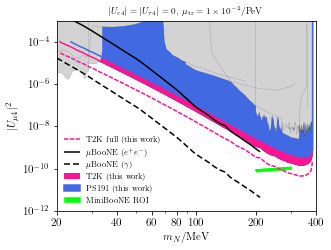

In [22]:
######
fig, ax = std_fig()
rcParams.update(params)

# HNL mass span
x = np.logspace(np.log10(20),np.log10((m_neutral_kaon - m_mu)*1e3), 1000, endpoint=True)


###################################
# plot all existing constraints

list_of_bounds=umu4.get_individual_bounds(muon_bounds, m4min=0.01, m4max=0.2)
LW = 0.1
# _ = plot_bound(ax, list_of_bounds['SIN_87'], units=1e3)
_ = plot_bound(ax, list_of_bounds['PSI_87'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PS191'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['KEK'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['NA62_21'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_lowT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_highT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['deGouvea_lowmass'], units=1e3, lw=LW)


############################################
# our T2K bound -- magnetic moment
Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=event_rate_mag_mom, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['None'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], fc='None',lw=1.5, zorder=0)
ax.plot(bound[:,0],bound[:,1], c='deeppink', lw=1.5, zorder=10)
ax.fill_between(bound[:,0],bound[:,1],np.ones(len(bound[:,1])), fc='deeppink', label=r'T2K (this work)', lw=1.5, zorder=0)
# future ND280 -- 2e22 POT equivalent
ax.plot(bound[:,0],bound[:,1]/np.sqrt(POT_RATIO_FULL_T2K), c='deeppink', dashes=(3,1), label=r'T2K full (this work)', lw=1.5, zorder=10)

############################################
# our PS191 bound (our own calculation)
Xi,Yi,Zi=interp_grid(x=m4_grid_PS191*1e3, y=usqr_grid_PS191 , z=event_rate_mag_mom_PS191, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['royalblue'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], label=r'PS191 (this work)', ec='royalblue', fc='royalblue',lw=1.5, zorder=0)
ax.plot(bound[:,0],bound[:,1], c='royalblue',  lw=1.5, zorder=10)

#########################
# MuBooNE
dip = 5e-9
xmub = np.logspace(np.log10(20),np.log10(210), 1000, endpoint=True)
new_muboone_bound = rescale_muboone_to_SBN(xmub*1e-3, dipoles=[0,dip,0], detector=muboone_numi_absorber)
ax.plot(xmub, new_muboone_bound, c='black', dashes=(8,0), lw=1.5, label=r'$\mu$BooNE ($e^+ e^-$)',zorder=100)
new_muboone_bound = rescale_muboone_to_SBN(xmub*1e-3, channel='nu_gamma', dipoles=[0,dip,0], detector=muboone_numi_absorber)
ax.plot(xmub, new_muboone_bound, c='black', dashes=(4,2), lw=1.5, label=r'$\mu$BooNE ($\gamma$)',zorder=100)


############################################
# BBN -- tau = 0.023 s
# BBNCOLOR='orchid'
# matplotlib.rcParams['hatch.color'] = BBNCOLOR  # previous pdf hatch linewidth
# matplotlib.rcParams['hatch.linewidth'] = 0.2  # previous pdf hatch linewidth

# Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=c_LIGHT*lifetime_mag_mom, logx=False, logy=True)
# level_1 = contour(Xi, Yi, Zi, levels = [100], colors=['None'], linestyles=['-']) #NEW CONSTRAINT
# # _ = contourf(Xi, Yi, Zi, levels = [100,np.inf], colors=['None'], alpha=0, hatches=['/////////////'], linestyles=['-'], zorder=1) #NEW CONSTRAINT
# bound = level_1.collections[0].get_paths()[0].vertices  #grab the coords of the bound
# ax.vlines(bound[0,0],0,1, colors=BBNCOLOR,  lw=1.5)


xmb = np.logspace(np.log10(200),np.log10(300), 1000, endpoint=True)
nevents_MB = 400
n_sigmas = 3
ax.plot(xmb, 1e-10*(xmb/250)**0.7*(nevents_MB/400), c='lime')
ax.fill_between(xmb, 1e-10*(xmb/250)**0.7*((nevents_MB-n_sigmas*np.sqrt(nevents_MB))/400),
                    1e-10*(xmb/250)**0.7*((nevents_MB+n_sigmas*np.sqrt(nevents_MB))/400),
                        fc='lime', ec='lime', lw=0.5,  label=r'MiniBooNE ROI')

####
# labels
ax.set_title(fr"$|U_{{e4}}| = |U_{{\tau 4}}| = 0$,  $\mu_{{\rm tr}} = 1\times10^{{-2}}/$PeV",fontsize=9)
ax.legend(loc='lower left', frameon=False, ncol=1, fontsize=8)
# ax.annotate(r"$c\tau^0_N = \left(\frac{m_N^3}{1.2}\right)^2$", xy = (23,0.5e-13))

ax.set_xlim(np.min(x),np.max(x))
ax.set_ylim(1e-12,1e-3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$|U_{\mu 4}|^2$")
ax.set_xlabel(r"$m_{N}$/MeV")

ax.set_xticks(np.array([20, 40, 60, 80, 100, 200, 400]))
ax.set_xticklabels(np.array([20,40,60,80,100,200,400]))

fig.savefig('plots/dipole_decays_schwetz.pdf')
fig.savefig('plots/dipole_decays_schwetz.png', dpi=400)

In [91]:
# Rate in MeV, mass in GeV, and result in GeV^-1
def get_dipole_from_rate(rate, mass=0.250): 
    return np.sqrt(4*np.pi*rate*1e-3/mass**3)
get_dipole_from_rate(3e-17)

4.911968198143145e-09

In [93]:
# Rate in MeV, mass in GeV, and result in GeV^-1
def get_Gx_from_rate(rate, mass=0.250): 
    return np.sqrt(192*np.pi**3*rate*1e-3/mass**5)/Gf
get_Gx_from_rate(3e-17)

0.036664555702015274

In [49]:
table = np.load("limits_computed/T2K_schwetz_mag_mom_usqr.npy", allow_pickle=True)
dmu_grid, usqr_grid,  event_rate_mag_mom = table

table = np.load("limits_computed/PS191_schwetz_mag_mom_usqr.npy", allow_pickle=True)
dmu_grid_PS191, usqr_grid_PS191,  event_rate_mag_mom_PS191 = table

In [50]:
from hnl_apps.plot_tools import *

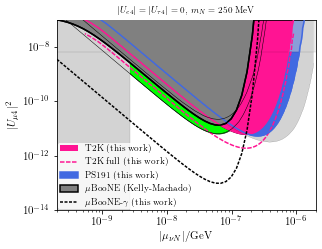

In [89]:
fig, ax = std_fig()
units=2 # translate to mag moment rather than dipole
x = np.logspace(-10, -6, 1000)

############################################
# Other bounds
# Kaon decays
ax.fill_between(x*units, 6.6e-9*x/x, x/x, fc='lightgray', alpha=0.5)
ax.plot(x*units, 6.6e-9*x/x, c='black', lw=0.1)
# SN 
sn_bound = get_dipole_from_rate(2.26e-18)
ax.fill_betweenx([0,1] , [0,0], [sn_bound*units,sn_bound*units],  fc='lightgrey', ec='None', lw =0.0, alpha=1)
ax.vlines(sn_bound*units, 0, 1, colors='black', lw=0.1)
# NOMAD
g_nomad, usqr_nomad = np.genfromtxt("digitized/Schwetz_dipole/250MeV_NOMAD.dat", unpack=True)
ax.fill_between(get_dipole_from_rate(g_nomad)*units, usqr_nomad, usqr_nomad/usqr_nomad,  fc='lightgrey', ec='None', lw =0.0, alpha=1, zorder=-1)
ax.plot(get_dipole_from_rate(g_nomad)*units, usqr_nomad, color='black', lw=0.1)

############################################
# our T2K bound -- magnetic moment
Xi,Yi,Zi=interp_grid(x=dmu_grid*units, y=usqr_grid , z=event_rate_mag_mom, logx=True, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['None'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], fc='None',lw=1.5, zorder=0)
ax.plot(bound[:,0],bound[:,1], c='deeppink', lw=1.5, zorder=10)
t2kregion1=ax.fill_between(bound[:,0],bound[:,1],np.ones(len(bound[:,1])), fc='deeppink', label=r'T2K (this work)', lw=1.5, zorder=1)
# future ND280 -- 2e22 POT equivalent
t2kregion2, =ax.plot(bound[:,0],bound[:,1]/np.sqrt(POT_RATIO_FULL_T2K), c='deeppink', dashes=(3,1), label=r'T2K full (this work)', lw=1.5, zorder=10)


############################################
# our PS191 bound (our own calculation)
Xi,Yi,Zi=interp_grid(x=dmu_grid_PS191*units, y=usqr_grid_PS191 , z=event_rate_mag_mom_PS191, logx=True, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['royalblue'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
PS191region=ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], label=r'PS191 (this work)', ec='royalblue', fc='royalblue',lw=1.5, zorder=0)
ax.plot(bound[:,0],bound[:,1], c='royalblue',  lw=1.5, zorder=10)

############################################
# muboone
mN = 0.250
dmu = np.logspace(-10,-6, 50)
new_muboone_bound = rescale_muboone_to_SBN_for_dip_vs_usqr(dmu, mN=mN, channel='nu_e_e', detector=muboone_numi_absorber)
ax.plot(dmu*units, new_muboone_bound, c='black', lw=1.5, zorder=10)
mubooneregion=ax.fill_between(dmu*units, new_muboone_bound, np.ones(len(new_muboone_bound)), fc='grey', ec='black', lw=1.5, label=r'$\mu$BooNE (Kelly-Machado)', alpha=1, zorder=4)

new_muboone_bound = rescale_muboone_to_SBN_for_dip_vs_usqr(dmu, mN=mN, channel='nu_gamma', detector=muboone_numi_absorber)
muboone_gamma, = ax.plot(dmu*units, new_muboone_bound, c='black', dashes=(2,1), lw=1.5, label=r'$\mu$BooNE$^*$ ($N \to \nu \gamma$)',zorder=100)



############################################
# ICARUS
# new_muboone_bound = rescale_muboone_to_SBN_for_dip_vs_usqr(dmu, mN=mN, channel='nu_e_e', detector=icarus_numi_absorber)
# ax.plot(dmu*units, new_muboone_bound, c='grey', dashes=(8,2), lw=1.5, label=r'$\mu$BooNE$^*$ ($N \to \nu e^+ e^-$)',zorder=100)
# new_muboone_bound = rescale_muboone_to_SBN_for_dip_vs_usqr(dmu, mN=mN, channel='nu_gamma', detector=icarus_numi_absorber)
# ax.plot(dmu*units, new_muboone_bound, c='grey', dashes=(2,1), lw=1.5, label=r'$\mu$BooNE$^*$ ($N \to \nu \gamma$)',zorder=100)

############################################
# SBND
# new_muboone_bound = rescale_muboone_to_SBN_for_dip_vs_usqr(dmu, mN=mN, channel='nu_e_e', detector=sbnd_numi_absorber)
# ax.plot(dmu*units, new_muboone_bound, c='green', dashes=(8,2), lw=1.5, label=r'$\mu$BooNE$^*$ ($N \to \nu e^+ e^-$)',zorder=100)
# new_muboone_bound = rescale_muboone_to_SBN_for_dip_vs_usqr(dmu, mN=mN, channel='nu_gamma', detector=sbnd_numi_absorber)
# ax.plot(dmu*units, new_muboone_bound, c='green', dashes=(2,1), lw=1.5, label=r'$\mu$BooNE$^*$ ($N \to \nu \gamma$)',zorder=100)

############################################
# MiniBooNE preference region
g_d, usqr_d = np.genfromtxt("digitized/Schwetz_dipole/250MeV_1sigma_above.dat", unpack=True)
f_1s_d = interpolate.interp1d(get_dipole_from_rate(g_d),usqr_d,bounds_error=False,fill_value=np.nan)
g_u, usqr_u = np.genfromtxt("digitized/Schwetz_dipole/250MeV_1sigma.dat", unpack=True)
f_1s_u = interpolate.interp1d(get_dipole_from_rate(g_u),usqr_u,bounds_error=False,fill_value=np.nan)
g_d, usqr_d = np.genfromtxt("digitized/Schwetz_dipole/250MeV_2sigma_above.dat", unpack=True)
f_2s_d = interpolate.interp1d(get_dipole_from_rate(g_d),usqr_d,bounds_error=False,fill_value=np.nan)
g_u, usqr_u = np.genfromtxt("digitized/Schwetz_dipole/250MeV_2sigma.dat", unpack=True)
f_2s_u = interpolate.interp1d(get_dipole_from_rate(g_u),usqr_u,bounds_error=False,fill_value=np.nan)

ax.fill_between(x*units, f_2s_d(x),f_2s_u(x), ec='black', lw=0.5, fc='lime', zorder=-1)
# ax.fill_between(x*units, f_1s_d(x),f_1s_u(x), ec='black', lw=0.5, fc='lime', label='MiniBooNE fit (1$\sigma$, 2$\sigma$)', zorder=-1)
ax.plot(x*units, f_2s_d(x), c='black', lw=0.5, zorder=20)
ax.plot(x*units, f_2s_u(x), c='black', lw=0.5, zorder=20)
# ax.plot(x*units, f_1s_d(x), c='black', lw=0.5, zorder=20)
# ax.plot(x*units, f_1s_u(x), c='black', lw=0.5, zorder=20)




legend1 = plt.legend([t2kregion1, t2kregion2, PS191region,mubooneregion,muboone_gamma], 
                     [r"T2K (this work)", r"T2K full (this work)", r"PS191 (this work)",r'$\mu$BooNE (Kelly-Machado)',r'$\mu$BooNE-$\gamma$ (this work)'], 
                     loc='lower left',markerfirst=True,edgecolor="None", 
                     fontsize=9, borderaxespad=0.1,  borderpad=0.2, frameon=True, framealpha=0.8, ncol=1,columnspacing=0.8)

# legend2 = plt.legend([mubooneregion], 
#                      [r'$\mu$BooNE (Kelly-Machado)'], 
#                      loc='lower right',markerfirst=True,edgecolor="None", fontsize=9, frameon=True, framealpha=0.8, ncol=1,columnspacing=1)
# ax.add_artist(legend1)
# ax.add_artist(legend2)


# TEST THE POSITION OF THE PEAK
# ctau_in_m_MB=540/(1.0/0.25)
# ctau_in_m_PS=128/(4.0/0.25)
# ctau_in_m_T2K=280/(4.0/0.25)
# ax.vlines([np.sqrt( invGeV_to_cm*(1/(ctau_in_m_MB*1e2))/0.25**3*4*np.pi),
#            np.sqrt( invGeV_to_cm*(1/(ctau_in_m_PS*1e2))/0.25**3*4*np.pi),
#            np.sqrt( invGeV_to_cm*(1/(ctau_in_m_T2K*1e2))/0.25**3*4*np.pi)],
#            0,1 )

ax.set_xlim(np.min(x*units),np.max(x*units))
ax.set_ylim(1e-14,1e-7)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$|\mu_{\nu N}|/$GeV")
ax.set_ylabel(r"$|U_{\mu 4}|^2$")

ax.set_title(fr"$|U_{{e4}}| = |U_{{\tau 4}}| = 0$,  $m_N = 250$~MeV",fontsize=9)
# ax.legend(loc='lower left', frameon=False, ncol=1, fontsize=8)

fig.savefig("plots/schwetz_et_al_other_limits.pdf")
fig.savefig("plots/schwetz_et_al_other_limits.png", dpi=400)

# checking the muboone extrapolation

/Users/matheushostert/Repos/stdHNL/hnl_apps/plot_tools.py:200: RuntimeWarning: invalid value encountered in sqrt
  beta = np.sqrt(1.0-1.0/(gamma)**2)
/Users/matheushostert/Repos/stdHNL/hnl_apps/hnl_tools.py:39: RuntimeWarning: invalid value encountered in sqrt
  beta = np.sqrt(1.0-1.0/(gamma)**2)


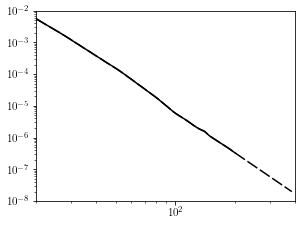

In [29]:
fig, ax = std_fig()

# HNL mass span
x = np.linspace(20,400, 1000, endpoint=True)

dip = 5e-7
new_muboone_bound = rescale_muboone_to_SBN(x*1e-3, dipoles=[0,0,0])
ax.plot(x, new_muboone_bound, c='black', dashes=(8,2), lw=1.5, label=r'$\mu$BooNE',zorder=100)

this_file = 'digitized/muboone_kelly_machado/PS_eff_avg.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
Umu4sq *= np.sqrt(2) # from Majorana --> Dirac (only approximate -- neglects effect on efficiencies)
ax.plot(m4, Umu4sq, c='black',  lw=1.5, label=r'$\mu$BooNE',zorder=100)


ax.set_xlim(np.min(x),np.max(x))
ax.set_ylim(1e-8,1e-2)
ax.set_xscale("log")
ax.set_yscale("log")

In [30]:
mN=0.1
EN = (m_neutral_kaon**2 + mN**2-m_mu**2)/2/m_neutral_kaon
gamma = EN/mN

print(gamma*c_LIGHT*hnl_tools.get_lifetime((mN,1e-5), flavor_struct=[0.0,1.0,0.0], dipoles=[0,0,0], GX=0)/1e2)
print(gamma*c_LIGHT*hnl_tools.get_lifetime((mN,1e-5), flavor_struct=[0.0,1.0,0.0], dipoles=[0,5e-7,0], GX=0)/1e2)

188534123.69224972
24.250881619334013


# Dark Z' model

In [31]:
table = np.load("limits_computed/T2K_zprime_Umu4.npy", allow_pickle=True)
m4_grid, usqr_grid, lifetime_zprime, event_rate_zprime = table

table = np.load("limits_computed/PS191_zprime_Umu4.npy", allow_pickle=True)
m4_grid_PS191, usqr_grid_PS191, lifetime_zprime_PS191, event_rate_zprime_PS191 = table

GX=1000*Gf

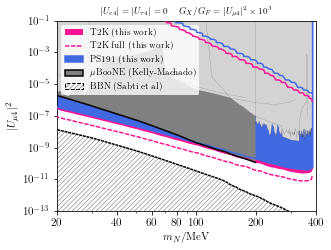

In [33]:
######
fig, ax = std_fig()

# HNL mass span
x = np.logspace(np.log10(20),np.log10((m_neutral_kaon - m_mu)*1e3), 1000, endpoint=True)

#########################
# MuBooNE
ratio_gamma_nuee = hnl_tools.get_gamma_nuee((0.1,1e-6), flavor_struct=[0.0,1.0,0.0], GX=GX)/hnl_tools.get_gamma_nuee((0.1,1e-6), flavor_struct=[0.0,1.0,0.0], GX=0)

###################################
# plot all existing constraints

list_of_bounds=umu4.get_individual_bounds(muon_bounds, m4min=0.01, m4max=0.2)
LW = 0.1
# _ = plot_bound(ax, list_of_bounds['SIN_87'], units=1e3)
_ = plot_bound(ax, list_of_bounds['PSI_87'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PS191'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['KEK'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['NA62_21'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_lowT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_highT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['deGouvea_lowmass'], units=1e3, lw=LW)


############################################
# our T2K bound -- Zprime
Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=event_rate_zprime, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['None'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound_up = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
bound_low = level_0.collections[0].get_paths()[1].vertices  #grab the coords of the bound
ax.plot(bound_low[:,0],bound_low[:,1], c='deeppink', lw=1.5, zorder=10)
ax.plot(bound_up[:,0],bound_up[:,1], c='deeppink', lw=1.5, zorder=10)
t2kregion1 = ax.fill_between(bound_low[:,0],bound_low[:,1],np.ones(len(bound_low[:,1])), fc='deeppink', label=r'T2K (this work)', lw=1.5, zorder=0)
# future ND280 -- 2e22 POT equivalent
t2kregion2, = ax.plot(bound_low[:,0],bound_low[:,1]/np.sqrt(POT_RATIO_FULL_T2K), c='deeppink', dashes=(3,1), label=r'T2K full (this work)', lw=1.5, zorder=10)


############################################
# PS191 rescaled
# N_observed = 30 # before handscan
# no_bkg, all_bkg = get_PS191_limit(x*1e-3, nevent_for_new_limit = np.sqrt(N_observed))
# _, all_sig = get_PS191_limit(x*1e-3, nevent_for_new_limit = N_observed+np.sqrt(N_observed))

# no_bkg /= np.sqrt(ratio_gamma_nuee)
# all_bkg /= np.sqrt(ratio_gamma_nuee)
# all_sig /= np.sqrt(ratio_gamma_nuee)

# ax.fill_between(x, np.ones(len(no_bkg)), no_bkg, facecolor='lightblue', lw=0.0,zorder=0)
# ax.fill_between(x, no_bkg, all_bkg, facecolor='lightblue', lw=0.0, label=r'PS191')
# ax.fill_between(x, all_bkg, all_sig, facecolor='lightblue', lw=0.0)
# ax.plot(x, no_bkg, color='dodgerblue', ls='-', zorder=10, label=r'PS191',lw=2)
# ax.plot(x, all_bkg, color='dodgerblue', ls='--', zorder=10)
# ax.plot(x, all_sig, color='', dashes=(2,1), zorder=10)

############################################
# our PS191 bound (our own calculation)
Xi,Yi,Zi=interp_grid(x=m4_grid_PS191*1e3, y=usqr_grid_PS191 , z=event_rate_zprime_PS191, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['royalblue'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound_up = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
bound_low = level_0.collections[0].get_paths()[1].vertices  #grab the coords of the bound
PS191region = ax.fill_between(bound_low[:,0],bound_low[:,1],bound_low[:,1]/bound_low[:,1], label=r'PS191 (this work)', ec='royalblue', fc='royalblue',lw=1.5, zorder=0)
ax.plot(bound_up[:,0],bound_up[:,1], c='royalblue', lw=1.5, zorder=10)
ax.plot(bound_low[:,0],bound_low[:,1], c='royalblue',  lw=1.5, zorder=10)

#########################
# MuBooNE
this_file = 'digitized/muboone_kelly_machado/PS_eff_avg.dat'
# this_file = 'digitized/muboone_kelly_machado/PS_eff_scalar.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
Umu4sq *= np.sqrt(2) # from Majorana --> Dirac (only approximate -- neglects effect on efficiencies)
f = interpolate.interp1d(np.log10(m4), np.log10(Umu4sq), kind='linear', bounds_error=False, fill_value=np.nan, assume_sorted=False)
# fext = interpolate.interp1d(np.log10(m4), np.log10(Umu4sq), kind='linear', bounds_error=False, fill_value="extrapolate", assume_sorted=False)
ratio_gamma_nuee = hnl_tools.get_gamma_nuee((0.1,1e-6), flavor_struct=[0.0,1.0,0.0], GX=GX)/hnl_tools.get_gamma_nuee((0.1,1e-6), flavor_struct=[0.0,1.0,0.0], GX=0)
# x = np.logspace(np.log10(np.min(m4)), np.log10(np.max(m4)))
new_muboone_bound = 10**f(np.log10(x))/np.sqrt(ratio_gamma_nuee)
# new_muboone_bound_ext = 10**fext(np.log10(x))/np.sqrt(ratio_gamma_nuee)

_ = ax.fill_between(x, new_muboone_bound, np.ones(len(new_muboone_bound)), fc='grey', ec='None', lw=1.5, alpha=1, zorder=0)
mubooneregion = ax.fill_between(x, np.ones(len(new_muboone_bound)), np.ones(len(new_muboone_bound)), fc='grey', ec='black', lw=1.5, label=r'$\mu$BooNE (Kelly-Machado)', alpha=1, zorder=0)
ax.plot(x, new_muboone_bound, c='black', lw=1.5, zorder=10)
# ax.plot(x, new_muboone_bound_ext, c='black', lw=1.5, zorder=10)


############################################
# SABTI BBN
BBNCOLOR='black'
matplotlib.rcParams['hatch.color'] = BBNCOLOR  # previous pdf hatch linewidth
matplotlib.rcParams['hatch.linewidth'] = 0.3  # previous pdf hatch linewidth

e_BBN,u_BBN = np.genfromtxt("digitized/Sabti_et_al/mixing_mN_muon.dat", unpack=True)

ratio = []
for mass in e_BBN:
    r=hnl_tools.get_lifetime((mass,1e-6), flavor_struct=[0.0,1.0,0.0], GX=GX)/hnl_tools.get_lifetime((mass,1e-6), flavor_struct=[0.0,1.0,0.0], GX=0)
    ratio.append(1/r)
ratio = np.array(ratio)

BBNregion = ax.fill_between(e_BBN*1e3, u_BBN/ratio*0, u_BBN*0, fc='None', linestyle='--', ec=BBNCOLOR,  hatch='/////', zorder=-100, label=r'BBN')
_ = ax.fill_between(e_BBN*1e3, u_BBN/ratio, u_BBN*0, fc='None', linestyle='-', lw=0, ec=BBNCOLOR,  hatch='/////', zorder=-100, label=r'BBN')
ax.plot(e_BBN*1e3, u_BBN/ratio, c=BBNCOLOR, dashes=(2,0.5), lw=1.5, zorder=1)


####
# labels
ax.set_title(r"$|U_{e4}| = |U_{\tau 4}| = 0$ \,\,\, $G_X/G_F = |U_{\mu4}|^2 \times 10^{3}$",fontsize=9)

# In total 3x3 lines have been plotted
legend1 = plt.legend([t2kregion1, t2kregion2, PS191region,mubooneregion, BBNregion], 
                     [r"T2K (this work)", r"T2K full (this work)", r"PS191 (this work)",r'$\mu$BooNE (Kelly-Machado)',r'BBN (Sabti et al)'], 
                     loc='upper left',markerfirst=True,edgecolor="None", fontsize=9, frameon=True, framealpha=0.8, ncol=1,columnspacing=1)
# legend1 = plt.legend([t2kregion1, t2kregion2, PS191region], 
#                      [r"T2K (this work)", r"T2K full (this work)", r"PS191 (this work)"], 
#                      loc='upper left',markerfirst=True,edgecolor="None", fontsize=9, frameon=True, framealpha=0.8, ncol=1,columnspacing=1)
# legend2 = plt.legend([mubooneregion, BBNregion], 
#                      [r'$\mu$BooNE (Kelly-Machado)',r'BBN (Sabti et al)'], 
#                      loc='center left',markerfirst=True,edgecolor="None", fontsize=9, frameon=True, framealpha=0.8, ncol=1,columnspacing=1)
# ax.add_artist(legend1)
# ax.add_artist(legend2)

ax.set_xlim(np.min(x),np.max(x))
ax.set_ylim(1e-13,1e-1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$|U_{\mu 4}|^2$")
ax.set_xlabel(r"$m_{N}$/MeV")

ax.set_xticks(np.array([20, 40, 60, 80, 100, 200, 400]))
ax.set_xticklabels(np.array([20, 40, 60, 80, 100, 200, 400]))

fig.savefig('plots/dark_decays.pdf')
fig.savefig('plots/dark_decays.png', dpi=400)